In [17]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # change pyplots default style
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [18]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

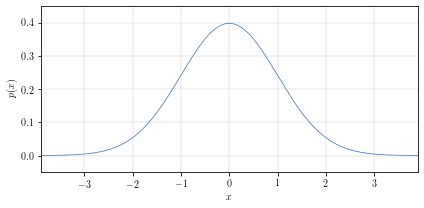

In [19]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(6, 3))
plt.xlim(-3.9, 3.9)
plt.ylim(-0.05, 0.45)
plt.plot(x, stats.norm.pdf(x), '-', linewidth=line, aa=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.tight_layout()
plt.savefig('out/appe/norm_pdf.pgf')

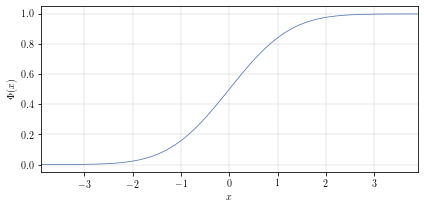

In [20]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(6, 3))
plt.xlim(-3.9, 3.9)
plt.ylim(-0.05, 1.05)
plt.plot(x, stats.norm.cdf(x), '-', linewidth=line, aa=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$\Phi(x)$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.tight_layout()
plt.savefig('out/appe/norm_cdf.pgf')

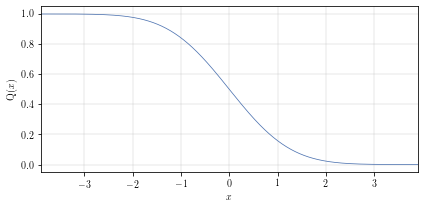

In [21]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(6, 3))
plt.xlim(-3.9, 3.9)
plt.ylim(-0.05, 1.05)
plt.plot(x, stats.norm.sf(x), '-', linewidth=line, aa=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{Q}(x)$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.tight_layout()
plt.savefig('out/appe/norm_ccdf.pgf')

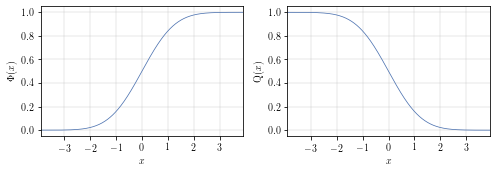

In [22]:
x = np.linspace(-5, 5, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2.5))
ax1.plot(x, stats.norm.cdf(x), '-', linewidth=line, aa=True)
ax2.plot(x, stats.norm.sf(x), '-', linewidth=line, aa=True)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\Phi(x)$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\mathrm{Q}(x)$')
ax1.set_xlim(-3.9, 3.9)
ax1.set_ylim(-0.05, 1.05)
ax2.set_xlim(-3.9, 3.9)
ax2.set_ylim(-0.05, 1.05)
ax1.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax2.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax1.grid(linewidth=0.3)
ax2.grid(linewidth=0.3)
plt.tight_layout()
# ax1.legend()
# ax2.legend()
plt.savefig('out/appe/norm_cs.pgf')

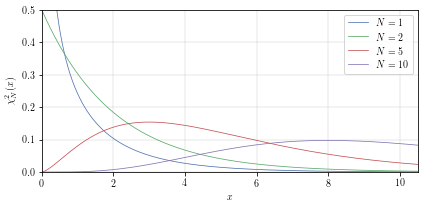

In [23]:
x = np.linspace(0, 12, 1000)
plt.figure(figsize=(6, 3))
plt.xlim(0, 10.5)
plt.ylim(0, 0.5)
plt.plot(x, stats.chi2.pdf(x, df=1), '-', linewidth=line, aa=True)
plt.plot(x, stats.chi2.pdf(x, df=2), '-', linewidth=line, aa=True)
plt.plot(x, stats.chi2.pdf(x, df=5), '-', linewidth=line, aa=True)
plt.plot(x, stats.chi2.pdf(x, df=10), '-', linewidth=line, aa=True)
plt.legend(('$N=1$', '$N=2$', '$N=5$', '$N=10$'), loc=0)
plt.xlabel(r'$x$')
plt.ylabel(r'$\chi_N^2(x)$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.tight_layout()
plt.savefig('out/appe/chi_pdf.pgf')

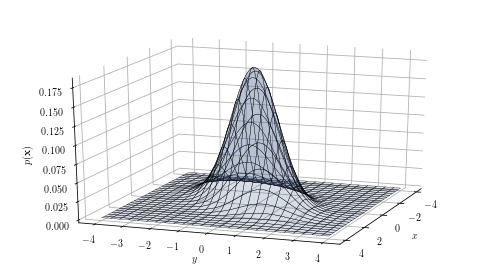

In [24]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
rv = stats.multivariate_normal(mu, cov)
Z = rv.pdf(pos)

fig = plt.figure(figsize=(7, 4))
ax = fig.gca(projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=4,
                cstride=4,
                alpha=0.20,
                linewidth=0.3,
                edgecolors=(0, 0, 0, 1))
ax.view_init(elev=20, azim=20)
ax.set_xticks([-4, -2, 0, 2, 4])
# ax.set_yticks([-4, -2, 0, 2, 4])
# ax.set_zticks([0.04, 0.08, 0.12])

ax.zaxis.set_rotate_label(False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$p(\mathbf{x})$', rotation=90)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

plt.tight_layout()
plt.savefig('out/appe/norm_pdf_2d.pgf')